# Team decides to use K-Means Clustering 
K-means clustering is an unsupervised clustering algorithm and that it belongs to the non-hierarchical class of clustering algorithms.

The data provided has some unnamed columns which made us conclude to use an unsupervised algorithm.

Types of Unsupervised Machine Learning
Unsupervised learning tasks can be broadly divided into 3 categories:

Association rule mining
Clustering
Recommendation system
1. Association Rule Mining
When we have transactional data for something, it can be for products sold or any transactional data for that matters.
2. Clustering
Clustering can be done any data where we do not have the class or label information. We want to group the data such that the observations with similar properties belong to the same cluster/group, and inter-cluster distance should be maximum.
We can use ​K-Means, K-Means++, K-Medoids, Fuzzy C-means (FCM)

Expectation-Maximisation (EM), Agglomerative Clustering, DBSCAN, Hierarchical Clustering types as single linkage, complete linkage, median linkage, Ward’s method algorithms for clustering.​
3. Recommendation System
Recommendation System is basically an extension of Association rule mining in a sense; we are extracting relationships in ARM.

Based on the above ,we use the K-means clustering as it also addresses unnamed columns which are classified as unsupervised(unlabelled)column.

    
STEPS:
Gather the data,
Create Recency Frequency Monetary (RFM) table,
Manage skewness and scale each variable,
Explore the data,
Cluster the data,
Interpret the result

In [3]:
# ! pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

In [16]:
path = "cust_seg_transformed.csv"

In [17]:
df = pd.read_csv(path)

In [18]:
df.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23.0,2012-08-10,0.0,35.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22.0,2012-08-10,0.0,35.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23.0,2012-08-10,0.0,35.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [19]:
df.isnull().sum()

Unnamed: 0               0
fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
i

In [21]:
df = df[df['ncodpers'].notna()]

In [22]:
df_fix = df.sample(10000, random_state = 42)
df_fix.shape

(10000, 48)

In [23]:
df_fix.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
987231,987231,2015-02-28,1163100,N,ES,H,26.0,2013-08-12,0.0,23.0,...,0,0,0,0,0,0,0,0.0,0.0,0
79954,79954,2015-01-28,932915,N,ES,V,43.0,2007-03-01,0.0,97.0,...,0,0,0,0,0,0,0,0.0,0.0,0
567130,567130,2015-01-28,428534,N,ES,V,39.0,2003-07-22,0.0,144.0,...,0,0,0,0,0,0,0,0.0,0.0,0
500891,500891,2015-01-28,673719,N,ES,H,35.0,2007-02-05,0.0,101.0,...,0,0,1,0,0,0,0,0.0,0.0,0
55399,55399,2015-01-28,1110550,N,ES,V,26.0,2012-12-07,0.0,31.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In this section, we grouped the customers into different classes. In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the Hamming's metric. Note that the kmeans method of sklearn uses a Euclidean distance that can be used, but it is not to the best choice in the case of categorical variables. However, in order to use the Hamming's metric, we need to use the kmodes package which is not available on the current plateform. Hence,we made an RFM Table which are numeric.

To make the RFM table, we can create these columns, such as Recency, Frequency, and MonetaryValue column.

To get the recency column, we can use the ind_nuevo(New customer Index. 1 if the customer registered in the last 6 months) 

To create the frequency column, we can use the ind_actividad_cliente(Activity index (1, active customer; 0, inactive customer)

Lastly, to create the monetary value column, we can sum all deposits(short,medium and large )for each customer.

In [24]:


# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["ind_deco_fin_ult1"] + df_fix["ind_deme_fin_ult1"] +  df_fix["ind_dela_fin_ult1"]



# Aggregate data by each customer
customers = df_fix.groupby(['ncodpers']).agg({
    'ind_nuevo': 'count',
    'ind_actividad_cliente': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'ind_nuevo': 'Recency',
                            'ind_actividad_cliente': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [25]:
customers.head()

,Recency,Frequency,MonetaryValue
ncodpers,,,
15902,1,1,1
15930,1,1,0
15956,1,1,0
16311,1,1,0
16355,1,1,0


Manage Skewness

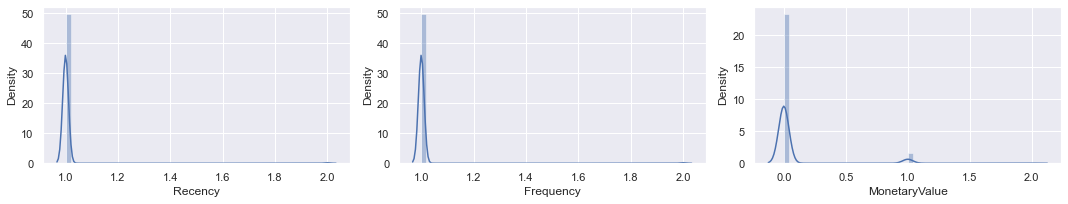

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

In [ ]:
As we can see from above, we do not have to transform the data, as it is in symmetrical form.

There are some methods that we can use to manage the skewness, they are,

log transformation,
square root transformation,
box-cox transformation,
Note: We can use the transformation if and only if the variable only has positive values.
    
Examples of how to transform data are shown below

In [27]:
#Data Transformtion examples
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(customers[x], ax=ax[0,0])
    sns.distplot(np.log(customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

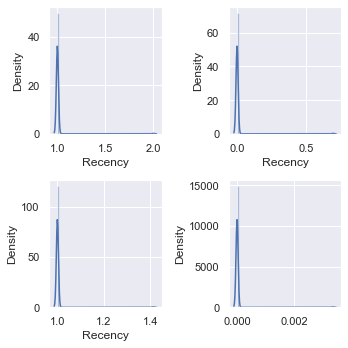

14.3
14.3
14.3
14.3


In [28]:
analyze_skewness('Recency')

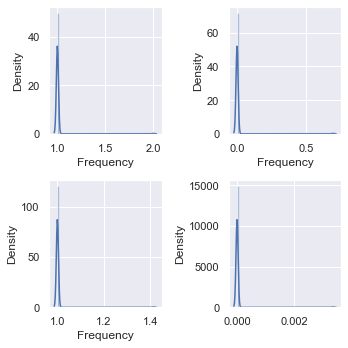

14.3
14.3
14.3
14.3


In [29]:
analyze_skewness('Frequency')

C:\Users\ritau\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ritau\anaconda3\lib\site-packages\scipy\stats\stats.py:2848: RuntimeWarning: invalid value encountered in subtract
  out = np.subtract(pct[1], pct[0])


ValueError: cannot convert float NaN to integer

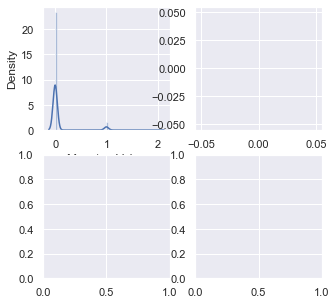

In [31]:
analyze_skewness('MonetaryValue')

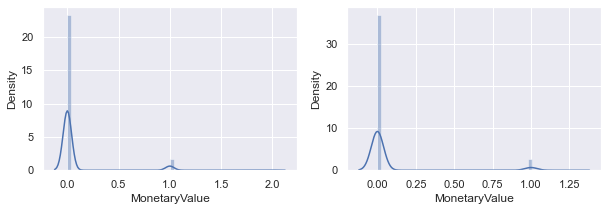

3.73
3.46


In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(customers['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [33]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

array([1., 0., 0., ..., 0., 0., 0.])

Here is how to interpret the skewness value. If the value is close to 0, the variable tend to have symmetrical form. However, if it’s not, the variable has skew on it. Based on that calculation,it seems the all have the same value,however I will be using box-cox transformations.

Hence,we will utilize variables that use box-cox transformations. Except for the MonetaryValue variable because the variable includes negative values. To handle this variable, we can use cubic root transformation to the data as seen above.

By using the transformation, we will have data that less skewed.Therefore, we can transform the RFM table with this code.

In [34]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.head(500)

,Recency,Frequency,MonetaryValue
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
495,0.0,0.0,0.0
496,0.0,0.0,0.0
497,0.0,0.0,0.0
498,0.0,0.0,0.0


In [35]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0. -0.  0.]
[1. 1. 1.]


Finally we can do Clustering

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0. -0.  0.]
[1. 1. 1.]


Choose K number:Before performing K-means clustering, let’s figure out the optimal number of clusters required, we’ll use the elbow method

<ipython-input-50-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-50-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-50-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-50-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-50-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)


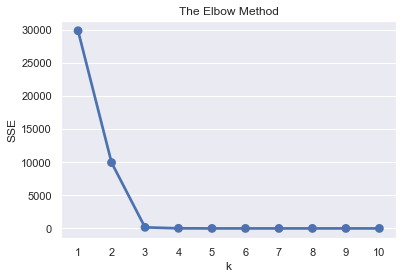

In [50]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

A clear bend can be seen at the 2nd cluster. Cool!

Next, fitting the k-means algorithm on the data…

In [51]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(9952,)

In [52]:
kmeans.fit(customers_normalized)

<ipython-input-52-807796f77164>:1: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)


KMeans(n_clusters=10, random_state=42)

In [53]:
customers.shape

(9952, 4)

Interpret The Segment
We can summarize the RFM table based on clusters and calculate the mean of each variable. The code will look like this,

In [54]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0             1         1          0.07  9904
1             2         2          0.29    48

Besides that, we can analyze the segments using snake plot. It requires the normalized dataset and also the cluster labels. By using this plot, we can have a good visualization from the data on how the cluster differs from each other. We can make the plot by using this code,

In [55]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.069617,-0.069617,3.680039,15902,0
1,-0.069617,-0.069617,-0.268808,15930,0
2,-0.069617,-0.069617,-0.268808,15956,0
3,-0.069617,-0.069617,-0.268808,16311,0
4,-0.069617,-0.069617,-0.268808,16355,0


In [56]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,15902,0,Recency,-0.069617
1,15930,0,Recency,-0.069617
2,15956,0,Recency,-0.069617
3,16311,0,Recency,-0.069617
4,16355,0,Recency,-0.069617


In [57]:
print(kmeans.cluster_centers_)

[[14.36430762 14.36430762 -0.2688082 ]
 [14.36430762 14.36430762  4.70642707]
 [14.36430762 14.36430762  4.70642707]
 [-0.069617   -0.069617    3.68003865]
 [-0.069617   -0.069617    4.70642707]
 [-0.069617   -0.069617   -0.2688082 ]
 [14.36430762 14.36430762 -0.2688082 ]
 [14.36430762 14.36430762  4.70642707]
 [14.36430762 14.36430762 -0.2688082 ]
 [14.36430762 14.36430762 -0.2688082 ]]


In [58]:
y_km = kmeans.fit_predict(df_extracted)

In [59]:
frequency_dict = {}

for y in y_km:
    if y not in frequency_dict:
        frequency_dict[y] = 1
    else:
        frequency_dict[y] += 1

print(frequency_dict)

{0: 400810, 9: 446334, 5: 113301, 8: 32622, 2: 5729, 7: 806, 3: 213, 6: 91, 1: 68, 4: 26}


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

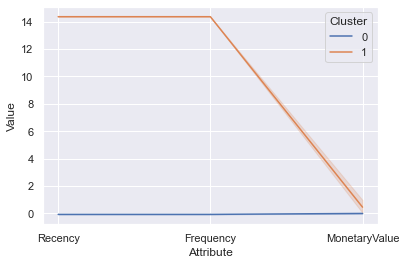

In [86]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

# By using this plot, we know how each segment differs. It describes more than we use the summarized table.

We infer that cluster 0 are new customers,less active,made no deposits. Therefore, it could be the cluster of a new customers.

Finally, the cluster 1 are old customers, more active, but less deposits. Therefore, it could be the cluster of Repeat customers.




In [87]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0             1         1           0.1  9904
1             2         2           0.3    48

# The below data is already skewed,hence no need for  transfomation,we will start the clustering

In [88]:
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
ncodpers,,,,
15902,1,1,1,0
15930,1,1,0,0
15956,1,1,0,0
16311,1,1,0,0
16355,1,1,0,0


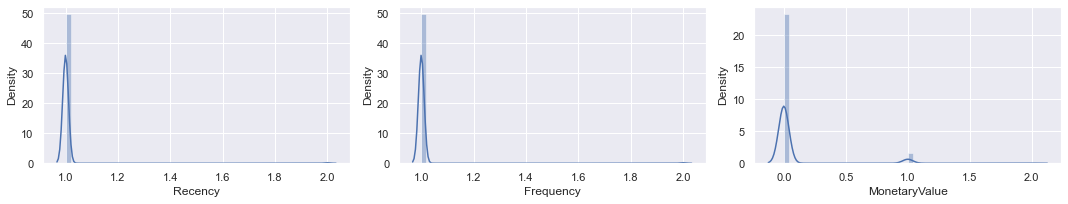

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers)
customers_normalized = scaler.transform(customers)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0. -0.  0.]
[1. 1. 1.]


<ipython-input-111-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-111-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-111-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-111-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)
<ipython-input-111-bdef2323907b>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(customers_normalized)


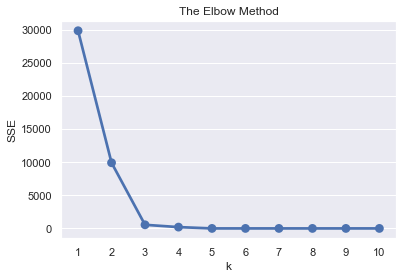

In [111]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [112]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(9952,)

In [113]:
customers.shape

(9952, 3)

In [114]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0             1         1          0.07  9904
1             2         2          0.29    48

In [115]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.069617,-0.069617,3.541699,15902,0
1,-0.069617,-0.069617,-0.265082,15930,0
2,-0.069617,-0.069617,-0.265082,15956,0
3,-0.069617,-0.069617,-0.265082,16311,0
4,-0.069617,-0.069617,-0.265082,16355,0


In [116]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,15902,0,Recency,-0.069617
1,15930,0,Recency,-0.069617
2,15956,0,Recency,-0.069617
3,16311,0,Recency,-0.069617
4,16355,0,Recency,-0.069617


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

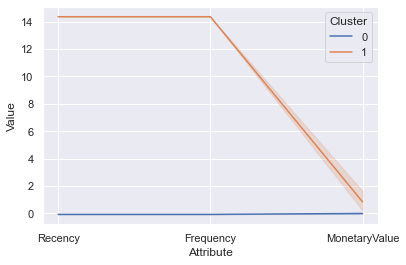

In [117]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

By using this plot, we know how each segment differs. It describes more than we use the summarized table.

We infer that cluster 0 is they are new customers,less active,made no deposits. Therefore, it could be the cluster of a new customers.

Finally, the cluster 1 is old customers, more active, but less deposits. Therefore, it could be the cluster of Repeat customers.


# We could see that the same value was gotten without performing Transformation because the original values were perfectly skewed,hence there was no need to transform the data.

# 